## Fitting

We now turn to the fitting of the data collected to determine the system parameters.

To do this, we use Probst's paper and take a resonant frequency such as :

$$f_{res} = \frac{1}{2\pi\sqrt{L_gCC_g+C^*}}$$

The impedance for our line + resonator system is :

$$  Z_{LCR} = \bigg( \frac{1}{i\omega L}+i\omega C + \frac{1}{R}\bigg)^{-1}  $$

We also have : 

$$ S_{11} = \Gamma = \frac{Z - Z_0}{Z + Z_0} $$

There are losses in the line, so :

$$ S_{11} = \Gamma = A\frac{Z - Z_0}{Z + Z_0} $$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
file_path = 'S11_capalength_final.csv'
data44 = np.loadtxt(file_path, delimiter=',', skiprows=1)
file_path = 'S11_capalength_final_phase.csv'
data45 = np.loadtxt(file_path, delimiter=',', skiprows=1)

In [15]:
def linear_model(x, a, b):
    return a * x + b

def deroule(frequences,phase):
    popt, pcov = curve_fit(linear_model, frequences, phase)
    phase_deroule = phase-((popt[0]*frequences+popt[1]))
    return phase_deroule

In [16]:
def Z(omega,Ck,C,R):
    L=20e-12
    #C = 98.4e-12
    terme1 = 1/(1j*omega*L)
    terme2 = 1j*omega*C
    terme3 = 1/R
    terme6 = 1/(1j*omega*Ck)
    return terme6 + 1/(terme1+terme2+terme3)

def Gamma(omega,A,phi,Ck,C,R,Z0):
    L=20e-12
    #C = 98.4e-12
    terme4 = Z(omega,Ck,C,R) - Z0
    terme5 = Z(omega,Ck,C,R) + Z0

    return A*np.exp(1j*phi)*terme4/terme5

def AmpGamma(omega,A,phi,Ck,C,R,Z0):
    return np.abs(Gamma(omega,A,phi,Ck,C,R,Z0))

def PhaseGamma(omega,A,phi,Ck,C,R,Z0):
    return np.angle(Gamma(omega,A,phi, Ck,C,R,Z0))

In [17]:
nb_point = 100

freq_fit = data44[:nb_point,1]

omega = 2*np.pi*freq_fit*1e9
omega_th = np.linspace(omega[0],omega[-1],1000)

phase_001 = data45[0:nb_point,2]
#phase_01 = data45[nb_point:2*nb_point,2]
#phase_02 = data45[nb_point*2:3*nb_point,2]

ampl_001 = 10**(data44[:nb_point,2]/20)
#ampl_01 = 10**(data38[nb_point:2*nb_point,2]/20)
#ampl_02 = 10**(data38[nb_point*2:3*nb_point,2]/20)

Gamma_001 = ampl_001*np.exp(1j*phase_001)
#Gamma_01 =ampl_01*np.exp(1j*phase_01)
#Gamma_02 = ampl_02*np.exp(1j*phase_02)

In [18]:
ampl_phase_001 = np.concatenate((ampl_001,phase_001))
#ampl_phase_01 = np.concatenate((ampl_01,phase_01))
#ampl_phase_02 = np.concatenate((ampl_02,phase_02))

In [19]:
def fit_Gamma(omega,A,phi,Ck,C,R):
    Z0 = 57
    return np.concatenate((AmpGamma(omega,A,phi,Ck,C,R,Z0),PhaseGamma(omega,A,phi,Ck,C,R,Z0)))

p0=[0.98, -np.pi/2+0.6,1.0e-13,95e-12,1e3]

popt_001,pcov_001 = curve_fit(fit_Gamma, omega, ampl_phase_001, 
                          p0, maxfev=180000000)

#p0=[0.98, -np.pi/2+0.6,1.0e-13,92e-12,1e3]

#popt_01,pcov_01 = curve_fit(fit_Gamma, omega, ampl_phase_01, 
#                          p0, maxfev=180000000)

#p0=[0.98, -np.pi/2+0.4,0.85e-13,84e-12,0.5e3]

#popt_02,pcov_02 = curve_fit(fit_Gamma, omega, ampl_phase_02, 
#                          p0, maxfev=180000000)


In [20]:
f = np.linspace(freq_fit[0],freq_fit[-1],1000)
omega_th = f*2*np.pi*1e9

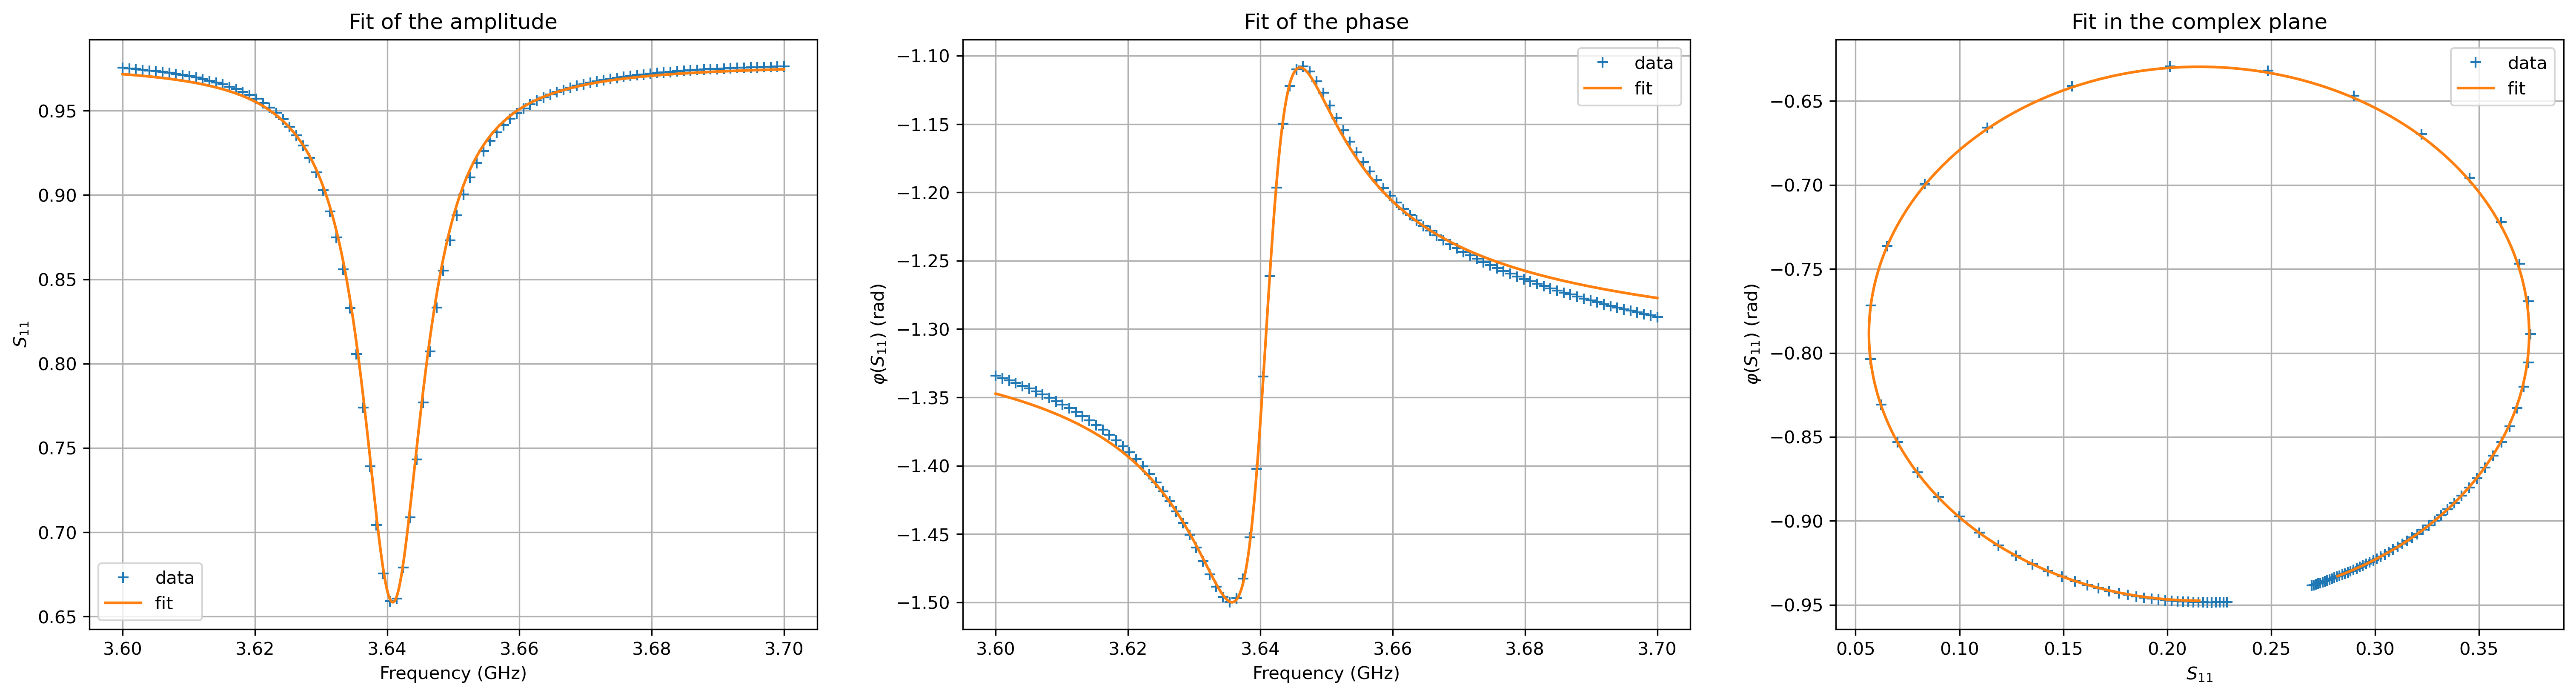

In [21]:
fit_params = [*popt_001, 57]

plt.rcParams['figure.dpi']=300

plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.plot(freq_fit, ampl_001, '+', label='data')
plt.plot(f, AmpGamma(omega_th, *fit_params), label='fit')
plt.grid()
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$')
plt.title('Fit of the amplitude')
plt.legend()

plt.subplot(1,3,2)
plt.plot(freq_fit, phase_001, '+', label='data')
plt.plot(f, PhaseGamma(omega_th, *fit_params), label='fit')
plt.grid()
plt.title('Fit of the phase')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$\varphi(S_{11})$ (rad)')

plt.legend()

Gamma_fit = AmpGamma(omega_th, *fit_params) * np.exp(1j * PhaseGamma(omega_th, *fit_params))

plt.subplot(1,3,3)
plt.plot(Gamma_001.real, Gamma_001.imag, '+', label='data')
plt.plot(Gamma_fit.real, Gamma_fit.imag, label='fit')
plt.grid()
plt.title('Fit in the complex plane')
plt.xlabel(r'$S_{11}$')
plt.ylabel(r'$\varphi(S_{11})$ (rad)')
plt.legend()

plt.savefig('Fit.png')


Qext= 15.49000875802376
Qext= 18.29311438742413
Qext= 20.602743292868116
Qext= 24.12666626656368
Qext= 28.92190480702389
Qext= 35.64768077974235
Qext= 38.23531584353471
Qext= 43.291581826590914


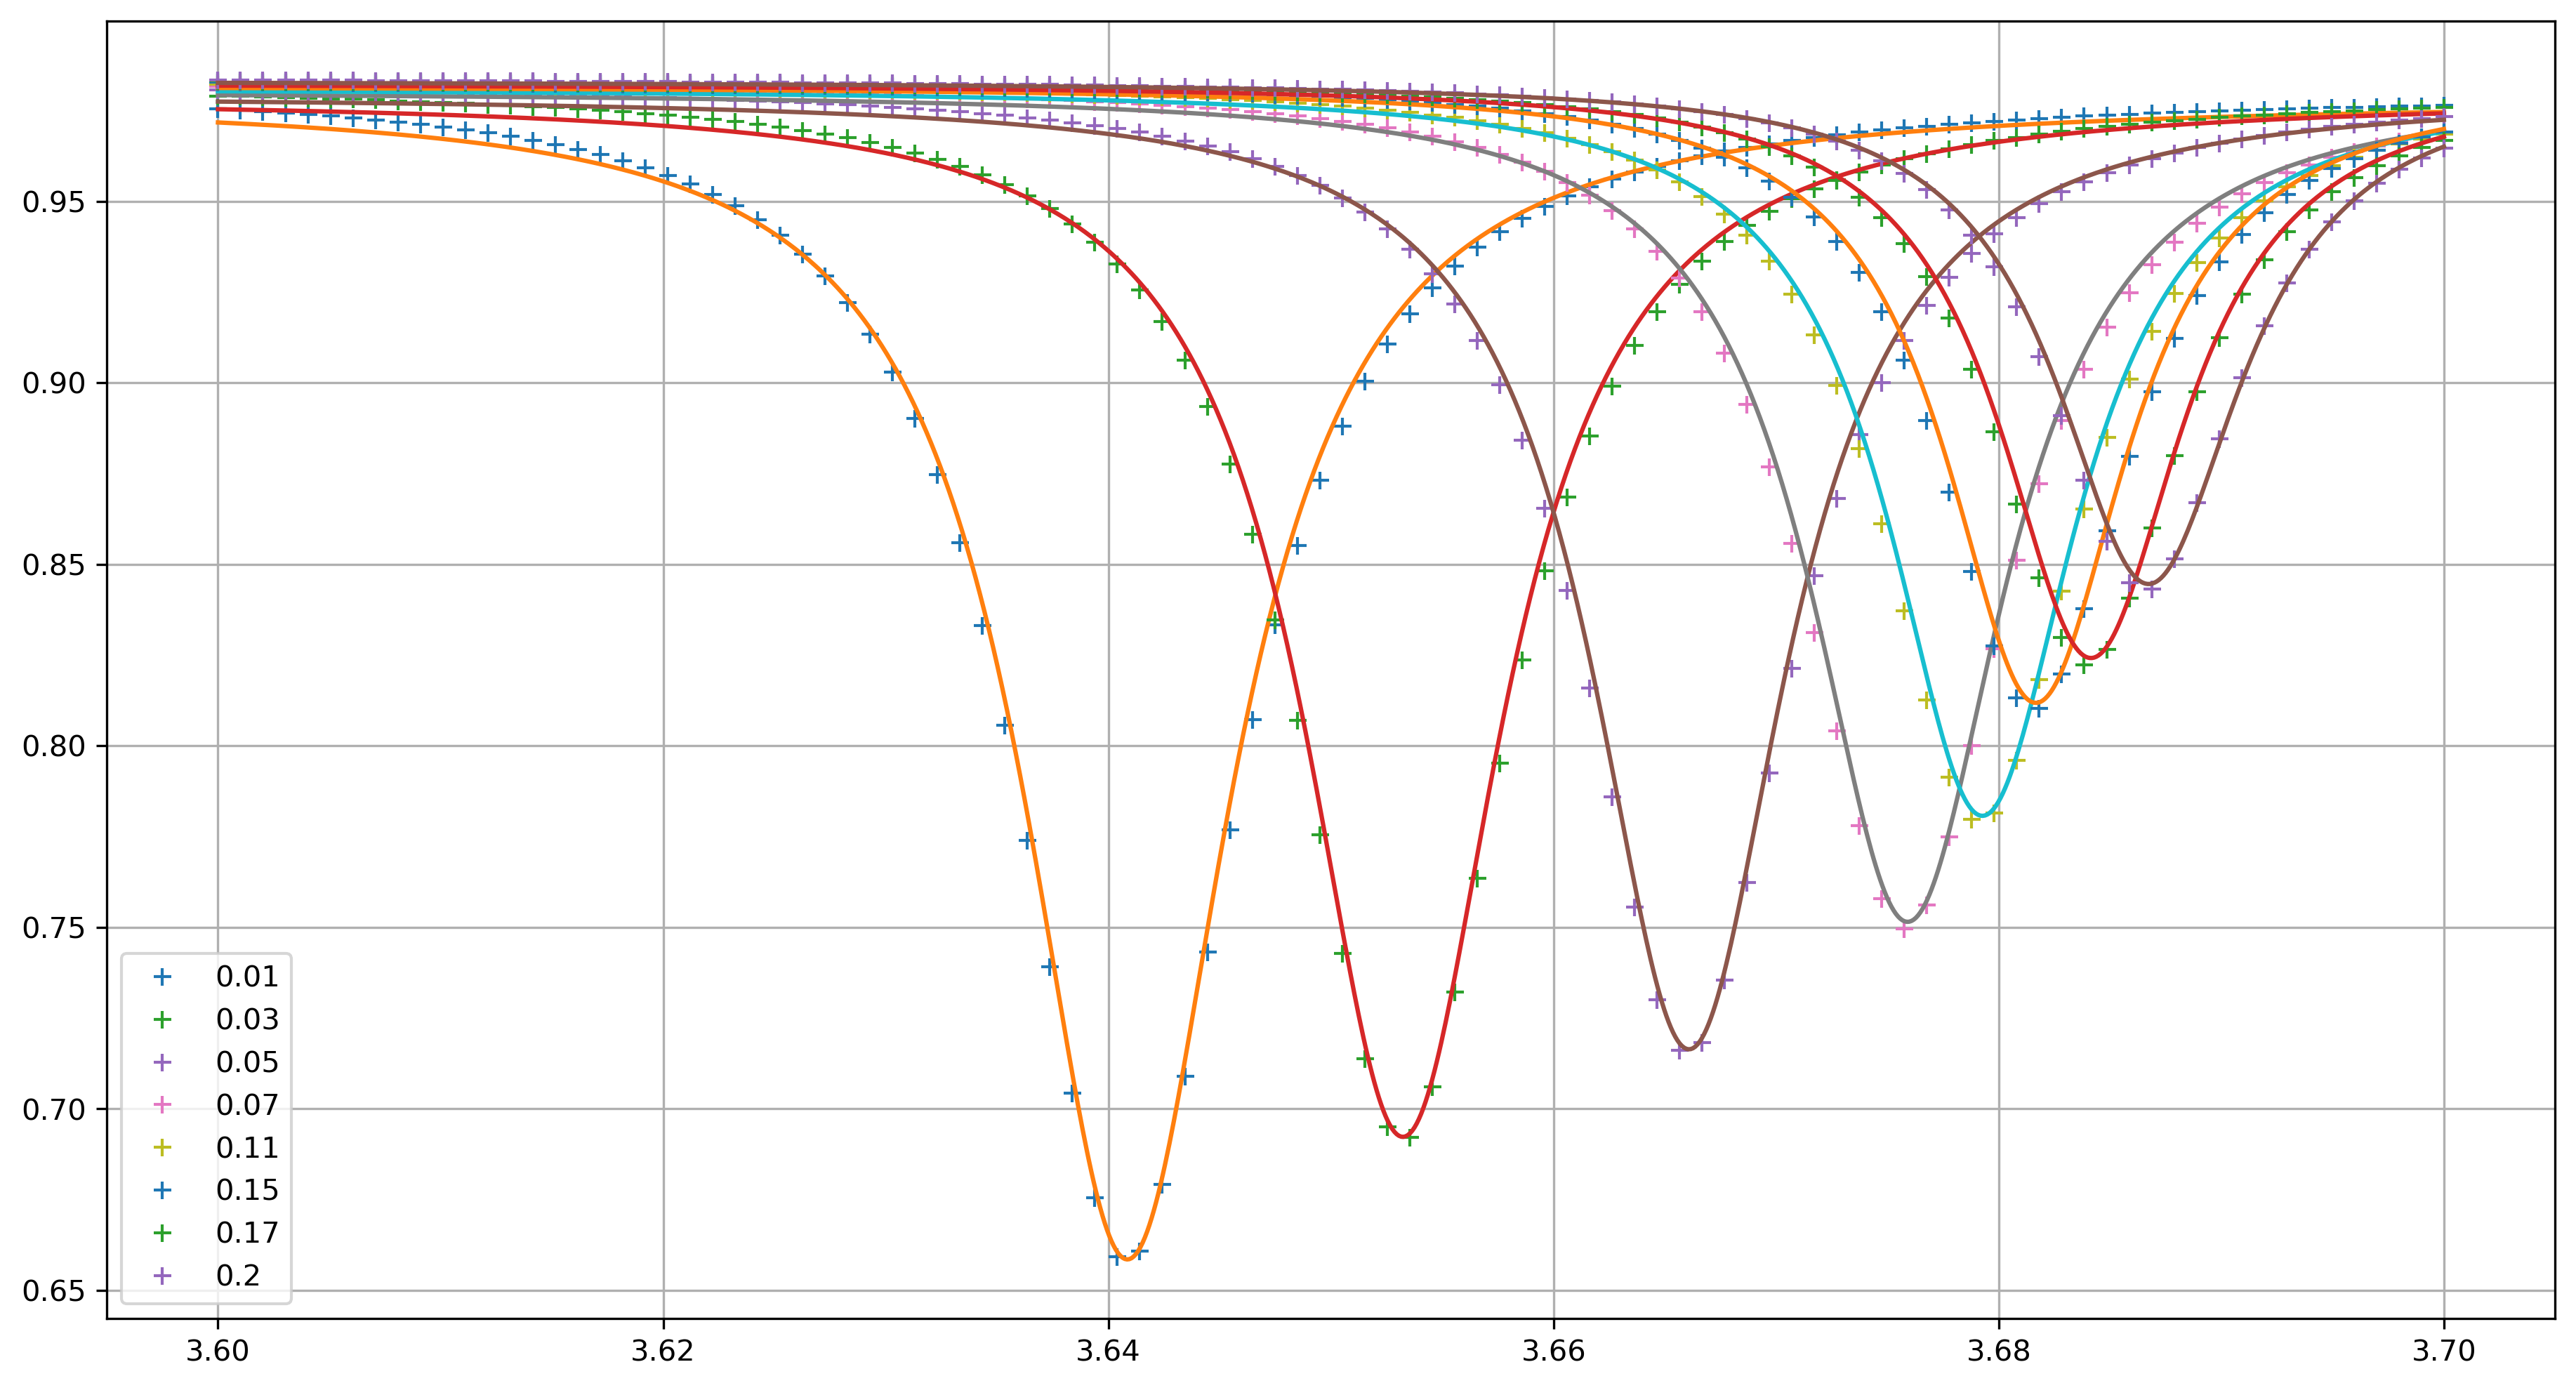

In [31]:
nb_point = 100

freq_fit = data44[:nb_point,1]

omega = 2*np.pi*freq_fit*1e9
omega_th = np.linspace(omega[0],omega[-1],1000)

p0=[0.98, -np.pi/2+0.6,1.0e-13,95e-12,1e3]
Params= []
capa=[]

plt.figure(figsize=(15,8))

for i in range(len(data44[:,1])//nb_point):
    phase = data45[nb_point*i:nb_point*(i+1),2]
    ampl = 10**(data44[nb_point*i:nb_point*(i+1),2]/20)
    Gamma_f = ampl_001*np.exp(1j*phase)
    ampl_phase = np.concatenate((ampl,phase))
    popt,pcov = curve_fit(fit_Gamma, omega, ampl_phase, 
                            p0, maxfev=180000000)
    p0=popt
    fit_params = [*popt, 57]

    Params.append(calc_param(*fit_params))
    capa.append(data44[nb_point*i,0])
    plt.plot(freq_fit, ampl, '+', label=str(data44[nb_point*i,0]))
    plt.plot(f, AmpGamma(omega_th, *fit_params))
plt.grid()
plt.legend()
plt.show()

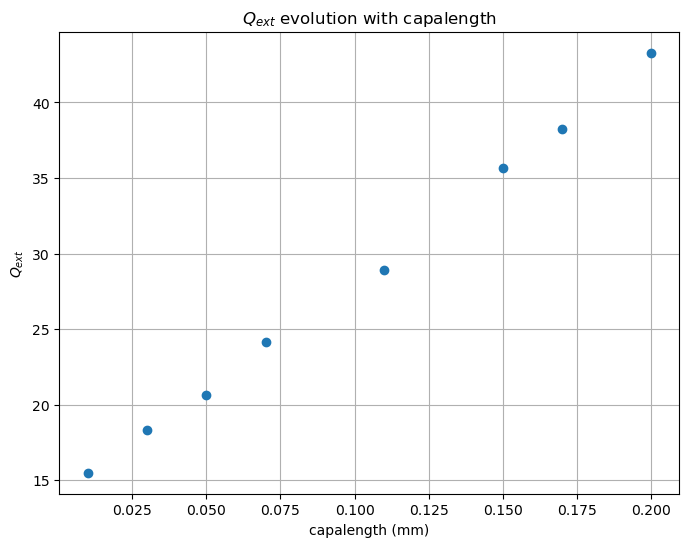

In [33]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(capa,[Params[i][4] for i in range(8)],'o')
plt.xlabel('capalength (mm)')
plt.ylabel(r'$Q_{ext}$')
plt.title(r'$Q_{ext}$ evolution with capalength')
plt.grid()

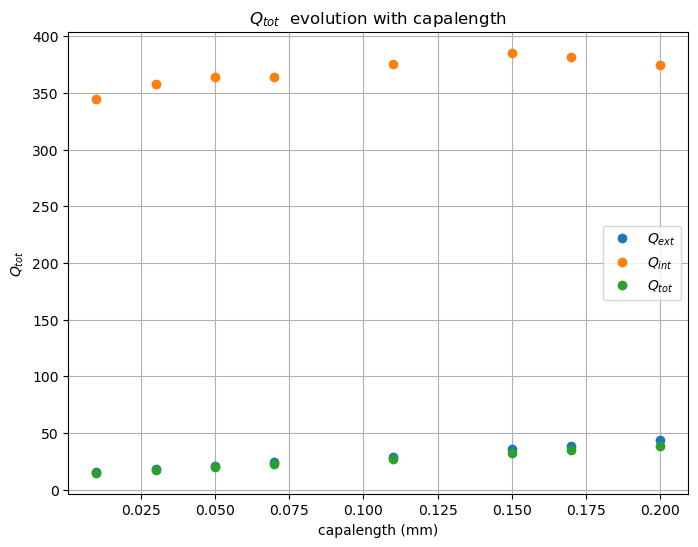

In [34]:
#wres, Rstar, Cstar, Qint, Qext, Qtot

plt.figure(figsize=(8,6), dpi=100)
plt.plot(capa,[Params[i][4] for i in range(8)],'o',label = r'$Q_{ext}$')
plt.plot(capa,[Params[i][3] for i in range(8)],'o', label = r'$Q_{int}$')
plt.plot(capa,[Params[i][5] for i in range(8)],'o',label = r'$Q_{tot}$')
plt.xlabel('capalength (mm)')
plt.legend()
plt.ylabel(r'$Q_{tot}$')
plt.title(r'$Q_{tot}$  evolution with capalength')
plt.grid()

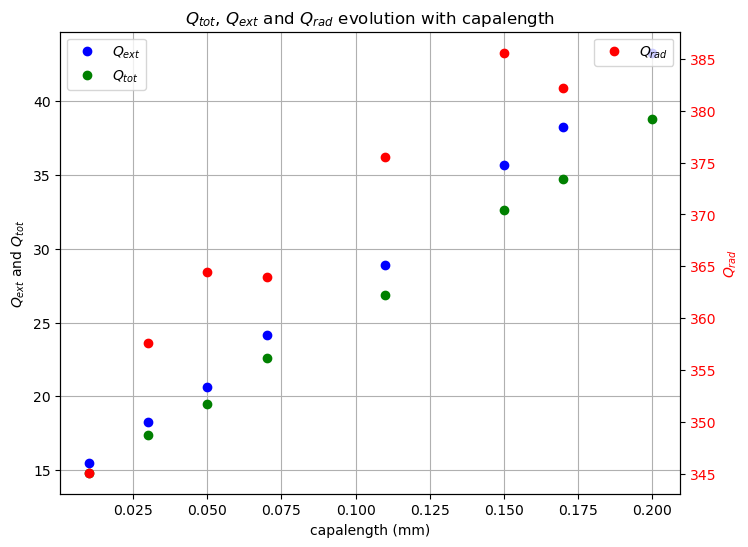

In [35]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8,6), dpi = 100)

# Plot Qext and Qtot on the first axis
ax1.plot(capa, [Params[i][4] for i in range(8)], 'o', label=r'$Q_{ext}$', color='blue')
ax1.plot(capa, [Params[i][5] for i in range(8)], 'o', label=r'$Q_{tot}$', color='green')

# Labels and title for the first y-axis
ax1.set_xlabel('capalength (mm)')
ax1.set_ylabel(r'$Q_{ext}$ and $Q_{tot}$', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid()

# Create a second y-axis for Qint
ax2 = ax1.twinx()
ax2.plot(capa[:-1], [Params[i][3] for i in range(7)], 'o', label=r'$Q_{rad}$', color='red')

# Labels for the second y-axis
ax2.set_ylabel(r'$Q_{rad}$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set the title
plt.title(r'$Q_{tot}$, $Q_{ext}$ and $Q_{rad}$ evolution with capalength')

# Show the plot
plt.show()


NameError: name 'popt_01' is not defined

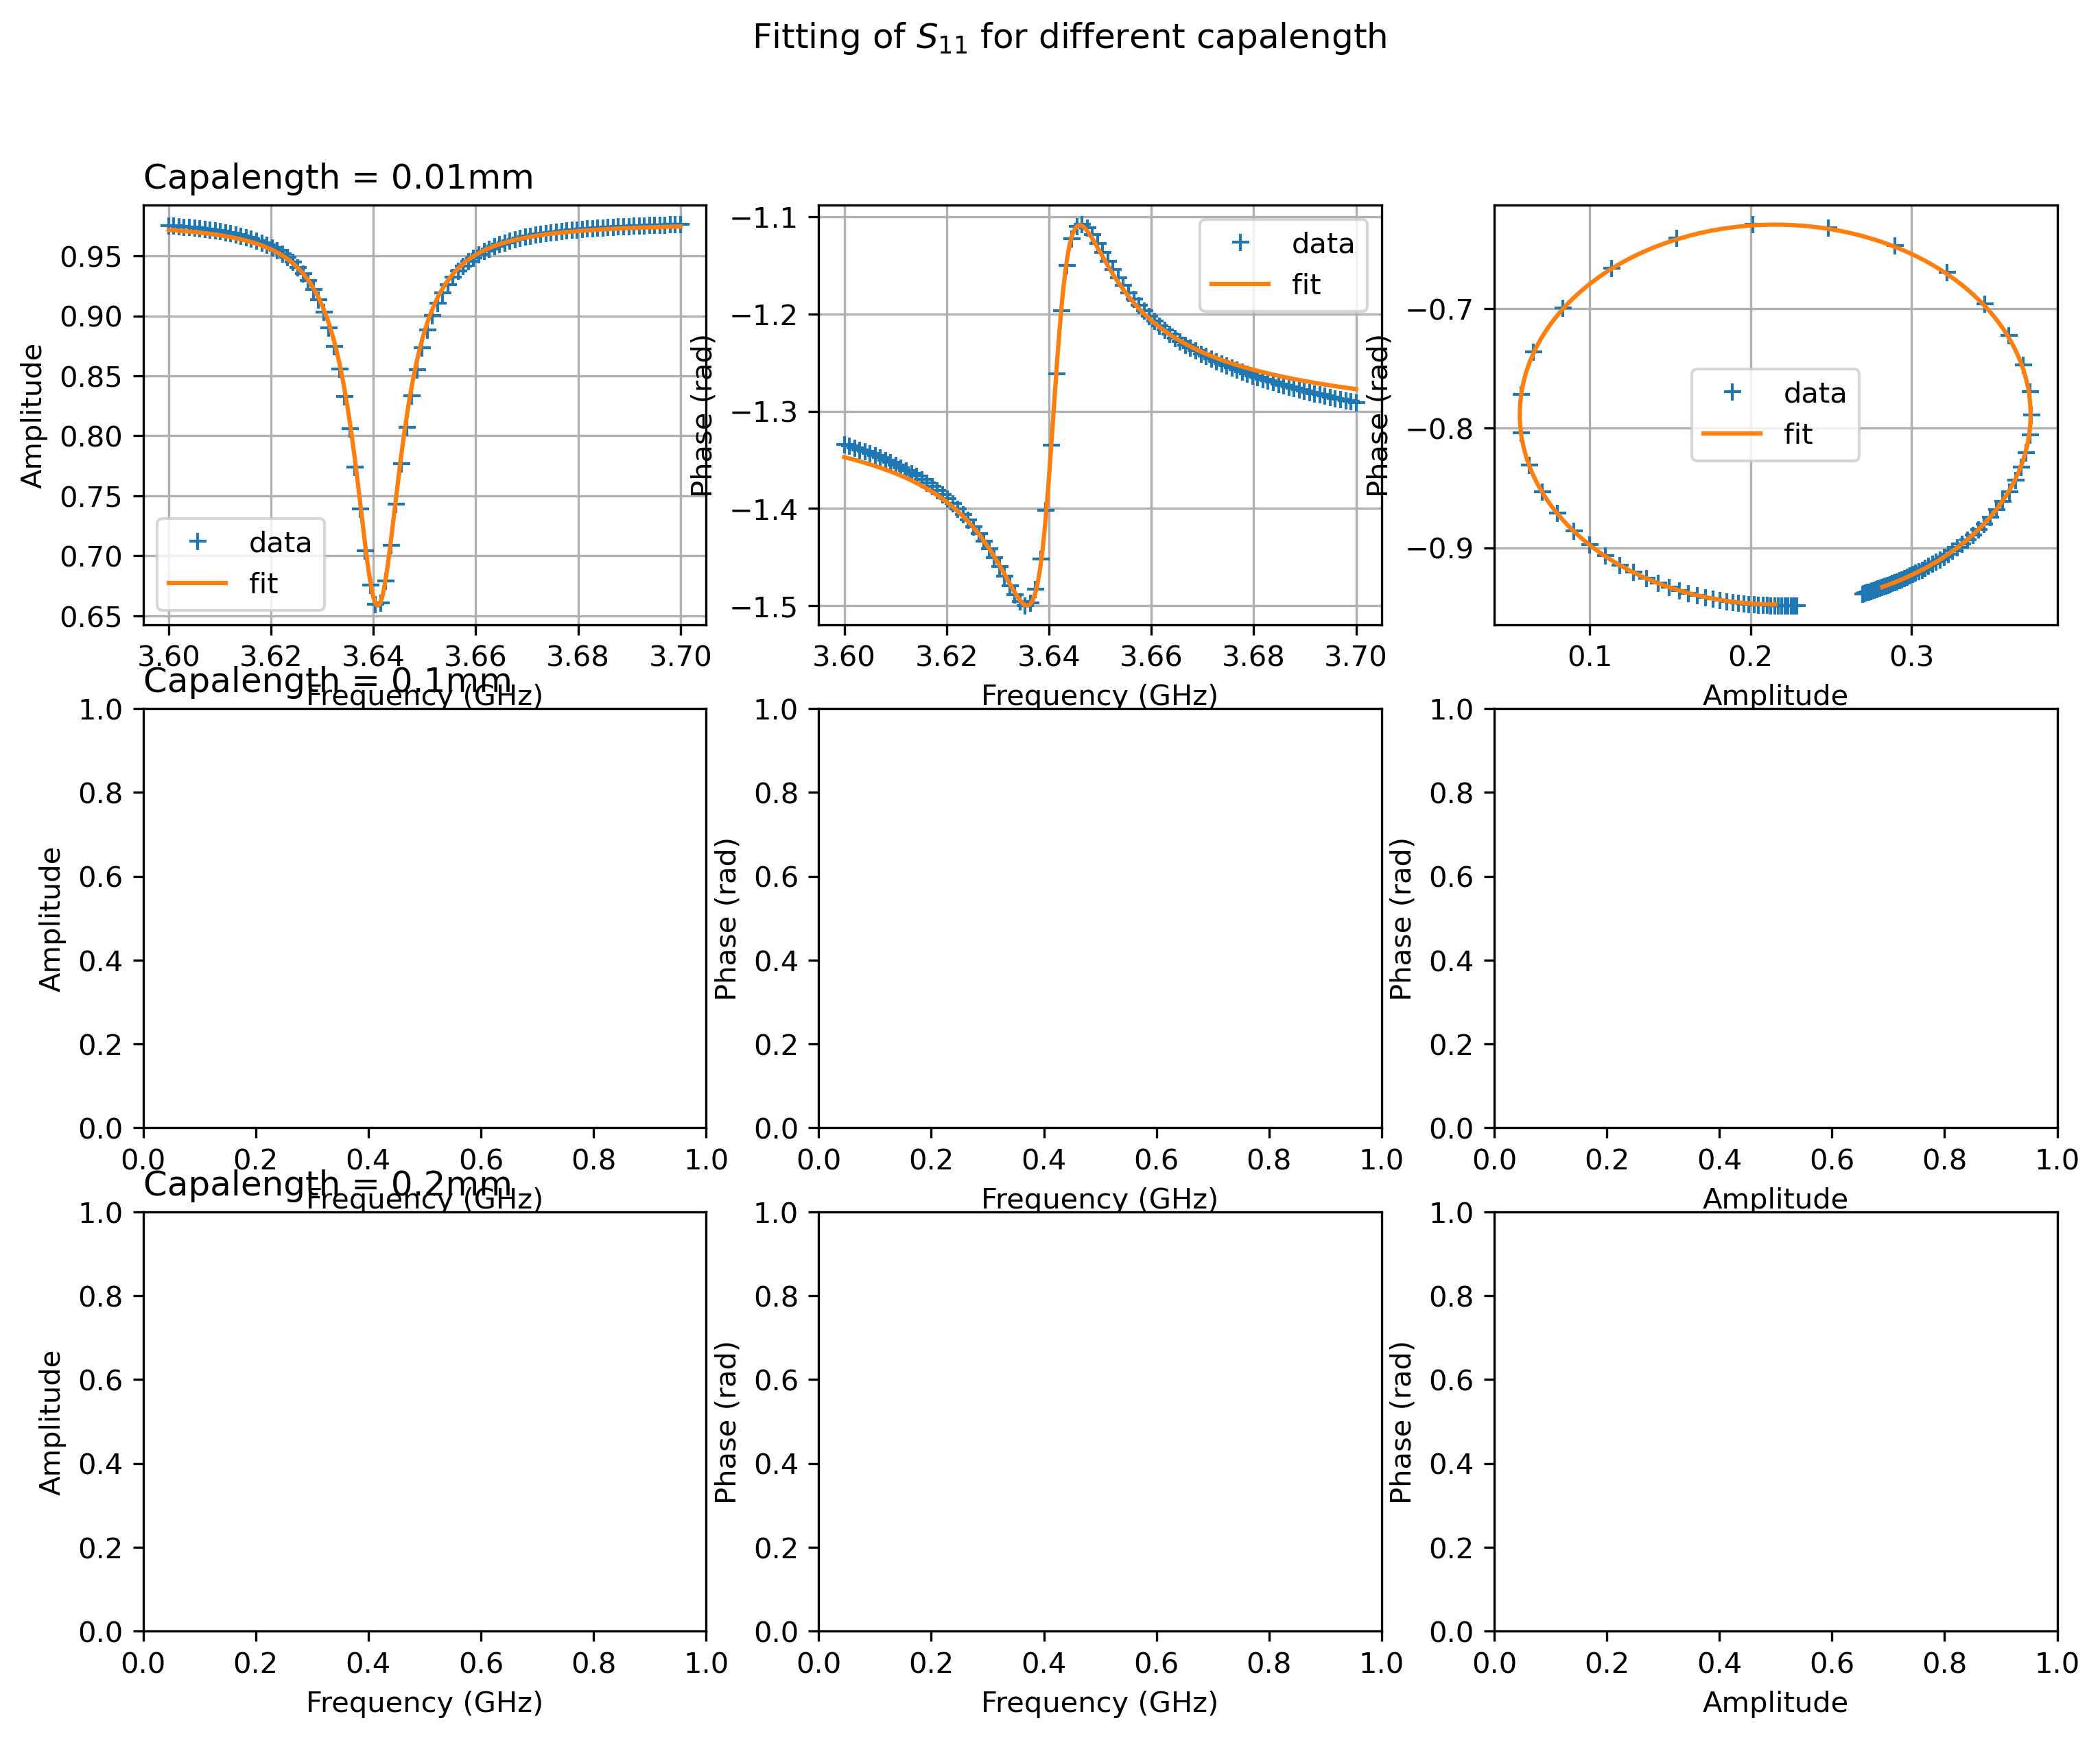

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(12, 9))
fig.suptitle(r'Fitting of $S_{11}$ for different capalength')

# Set common labels
for i in range(3):
    for j in range(3):
        if j == 0:
            ax[i, j].set_ylabel('Amplitude')
        if j == 1:
            ax[i, j].set_ylabel('Phase (rad)')
        if j == 0 or j == 1:
            ax[i, j].set_xlabel('Frequency (GHz)')
        if j == 2:
            ax[i, j].set_xlabel('Amplitude')
            ax[i, j].set_ylabel('Phase (rad)')

# Set row titles
ax[0, 0].set_title('Capalength = 0.01mm', loc='left')
ax[1, 0].set_title('Capalength = 0.1mm', loc='left')
ax[2, 0].set_title('Capalength = 0.2mm', loc='left')

#### 001 ####
fit_params = [*popt_001, 57]

ax[0, 0].plot(freq_fit, ampl_001, '+', label='data')
ax[0, 0].plot(f, AmpGamma(omega_th, *fit_params), label='fit')
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].plot(freq_fit, phase_001, '+', label='data')
ax[0, 1].plot(f, PhaseGamma(omega_th, *fit_params), label='fit')
ax[0, 1].grid()
ax[0, 1].legend()

Gamma_fit = AmpGamma(omega_th, *fit_params) * np.exp(1j * PhaseGamma(omega_th, *fit_params))
ax[0, 2].plot(Gamma_001.real, Gamma_001.imag, '+', label='data')
ax[0, 2].plot(Gamma_fit.real, Gamma_fit.imag, label='fit')
ax[0, 2].grid()
ax[0, 2].legend()

#### 01 ####
fit_params = [*popt_01, 57]

ax[1, 0].plot(freq_fit, ampl_01, '+', label='data')
ax[1, 0].plot(f, AmpGamma(omega_th, *fit_params), label='fit')
ax[1, 0].grid()
ax[1, 0].legend()

ax[1, 1].plot(freq_fit, phase_01, '+', label='data')
ax[1, 1].plot(f, PhaseGamma(omega_th, *fit_params), label='fit')
ax[1, 1].grid()
ax[1, 1].legend()

Gamma_fit = AmpGamma(omega_th, *fit_params) * np.exp(1j * PhaseGamma(omega_th, *fit_params))
ax[1, 2].plot(Gamma_01.real, Gamma_01.imag, '+', label='data')
ax[1, 2].plot(Gamma_fit.real, Gamma_fit.imag, label='fit')
ax[1, 2].grid()
ax[1, 2].legend()

#### 02 ####
fit_params = [*popt_02, 57]

ax[2, 0].plot(freq_fit, ampl_02, '+', label='data')
ax[2, 0].plot(f, AmpGamma(omega_th, *fit_params), label='fit')
ax[2, 0].grid()
ax[2, 0].legend()

ax[2, 1].plot(freq_fit, phase_02, '+', label='data')
ax[2, 1].plot(f, PhaseGamma(omega_th, *fit_params), label='fit')
ax[2, 1].grid()
ax[2, 1].legend()

Gamma_fit = AmpGamma(omega_th, *fit_params) * np.exp(1j * PhaseGamma(omega_th, *fit_params))
ax[2, 2].plot(Gamma_02.real, Gamma_02.imag, '+', label='data')
ax[2, 2].plot(Gamma_fit.real, Gamma_fit.imag, label='fit')
ax[2, 2].grid()
ax[2, 2].legend()

plt.tight_layout()
plt.show()


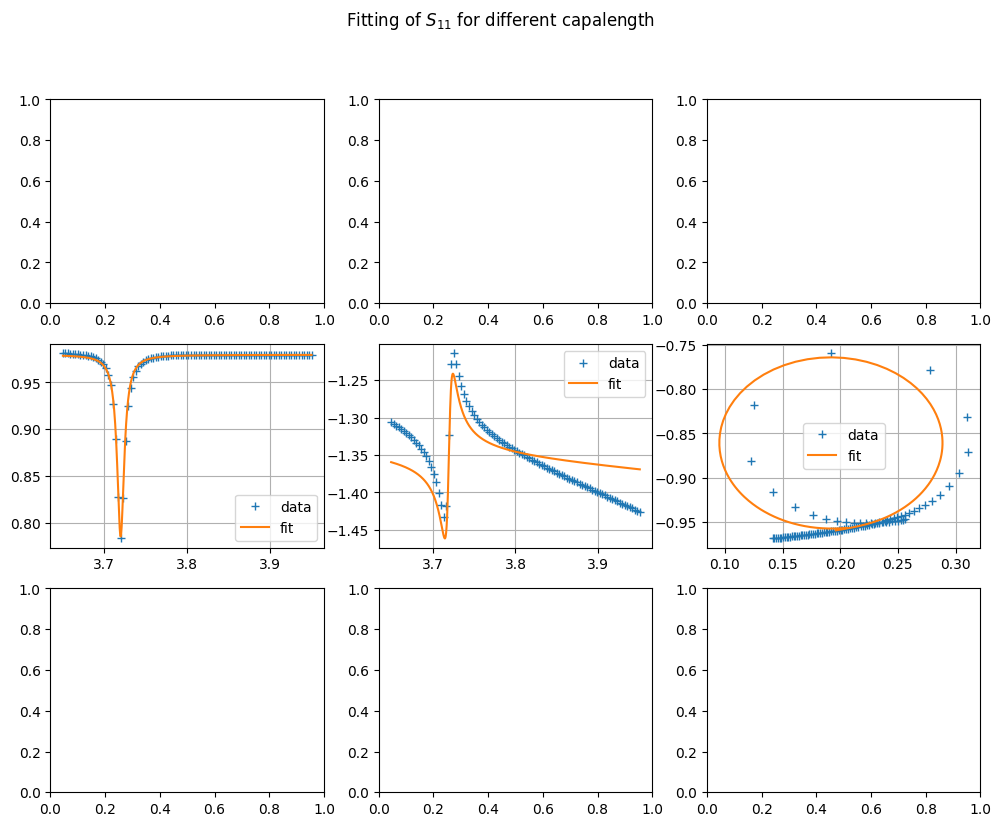

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(12, 9))
fig.suptitle(r'Fitting of $S_{11}$ for different capalength')


fit_params = [*popt_01, 57]

ax[1, 0].plot(freq_fit, ampl_01, '+', label='data')
ax[1, 0].plot(f, AmpGamma(omega_th, *fit_params), label='fit')
ax[1, 0].grid()
ax[1, 0].legend()

ax[1, 1].plot(freq_fit, phase_01, '+', label='data')
ax[1, 1].plot(f, PhaseGamma(omega_th, *fit_params), label='fit')
ax[1, 1].grid()
ax[1, 1].legend()

Gamma_fit = AmpGamma(omega_th, *fit_params) * np.exp(1j * PhaseGamma(omega_th, *fit_params))
ax[1, 2].plot(Gamma_01.real, Gamma_01.imag, '+', label='data')
ax[1, 2].plot(Gamma_fit.real, Gamma_fit.imag, label='fit')
ax[1, 2].grid()
ax[1, 2].legend()


In [ ]:
file_path = 'S11_capalength_26_07.csv'
data42 = np.loadtxt(file_path, delimiter=',', skiprows=1)
file_path = 'S11_capalength_26_07_phase.csv'
data43 = np.loadtxt(file_path, delimiter=',', skiprows=1)

In [ ]:
nb_point = 150

freq_test = data42[:nb_point,1]

print(data42[8*nb_point:9*nb_point,0])

omega = 2*np.pi*freq_test*1e9
omega_th = np.linspace(omega[0],omega[-1],1000)

phase_test = data43[8*nb_point:9*nb_point,2]

ampl_test = 10**(data42[8*nb_point:9*nb_point,2]/20)

Gamma_test = ampl_001*np.exp(1j*phase_001)

fig, ax = plt.subplots(1,3, figsize = (12,3))

#### 001 ####
fit_params = [0.98, -np.pi/2+0.44,0.78e-13,93.6e-12,0.6e3,57]

ax[0].plot(freq_test,ampl_test)
ax[0].plot(freq_test, AmpGamma(omega, *fit_params))

ax[1].plot(freq_test,phase_test)
ax[1].plot(freq_test,PhaseGamma(omega, *fit_params))

Gamma_fit_test = AmpGamma(omega, *fit_params)*np.exp(1j*PhaseGamma(omega,*fit_params))


ax[2].plot(Gamma_test.real, Gamma_test.imag)
ax[2].plot(Gamma_fit_test.real, Gamma_fit_test.imag)

NameError: name 'data42' is not defined

In [12]:
def calc_param(A,phi,Ck,C,R,Z0):
    L=20e-12
    wres = 1/(np.sqrt(L*C))
    Rstar = (1+wres**2 * Ck**2*Z0**2)/(wres**2*Ck**2*Z0**2)
    Cstar = Ck/(1+wres**2*Ck**2*Z0**2)
    Qint = wres*R*C
    Qext = (wres/2)*Rstar*C
    Qtot = 1/((1/Qint)+(1/Qext))
    print('Qext=' ,Qext)
    return wres, Rstar, Cstar, Qint, Qext, Qtot

In [ ]:
def fit_auto(Donnees_ampl,Donnees_phase, Guess):
    nb_point = 100

    freq_fit = Donnees_phase[:nb_point,1]

    omega = 2*np.pi*freq_fit*1e9
    f=np.linspace(freq_fit[0],freq_fit[-1],1000)
    omega_th = 2*np.pi*f

    phase = Donnees_phase[0:nb_point,2]
    ampl = 10**(Donnees_ampl[:nb_point,2]/20)
 
    Gamma = ampl*np.exp(1j*phase)

    ampl_phase = np.concatenate((ampl_001,phase_001))

    popt,pcov = curve_fit(fit_Gamma, omega, ampl_phase, Guess, maxfev=180000000)

    fit_params = [*popt, 57]

    plt.suptitle('fit capalength = '+str(Donnees_ampl[0,0]))
    plt.subplot(1,3,1)
    plt.plot(freq_fit,ampl,'+', label='data')
    plt.plot(f, AmpGamma(omega_th,*fit_params), label=fit)
    plt.grid()
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(freq_fit,phase,'+', label='data')
    plt.plot(f, PhaseGamma(omega_th,*fit_params), label=fit)
    plt.grid()
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(ampl,phase,'+', label='data')
    plt.plot(AmpGamma(omega_th,*fit_params), PhaseGamma(omega_th,*fit_params), label=fit)
    plt.grid()
    plt.legend()

    return fit_params